In [1]:
#requirement:
#install modules before run: import_ipynb, numpy, matplotlib.pylot, PIL, opencv 

In [1]:
import csv
from PIL import Image 
import numpy as np
import cv2
from matplotlib import pyplot as plt

### load and save data 

In [2]:
def num_of_stu():
    num = -1
    file = open("./resource/info.csv")
    reader = csv.reader(file)
    for row in reader: 
        if row != []:
            num+=1
    return num

In [3]:
#Convert the images to vectors
#Image size defaut : 400x500
def total_pixels():
    width = 400
    height = 500
    return (width*height)

In [4]:
def printInfo(ID):
    csv_file = csv.reader(open('./resource/info.csv', "r"), delimiter=",")
    for row in csv_file:
        if row == []:
            continue
        elif str(row[0]) == str(ID):
            print("Your full name: ",row[1])
            print("Your date of birth: ",row[2])
            print("Your class ID: ", row[3])
            print("Your student ID: ",row[4])           
            break

In [5]:
def saveImg(path):
    newname = str(num_of_stu()+1)
    img = Image.open(path,'r')
    newname = "./resource/dataset/" + newname
    name ='%s.jpg' %newname
    img = img.save(name)
        
def saveInfo(fullname, dob, classID, stuID):
    filename = r"./resource/info.csv"
    List = [fullname,dob,classID,stuID]
    with open(filename,'a') as file:
        writer_object = csv.writer(file)
        writer_object.writerow([num_of_stu()+1,fullname, dob, classID, stuID])
    file.close()
    print("====> SIGN UP COMPLETED")

In [27]:
def webcam():
    capture = cv2.VideoCapture(0)
    capture.set(cv2.CAP_PROP_FRAME_WIDTH, 1280)
    capture.set(cv2.CAP_PROP_FRAME_HEIGHT, 720)
    
    start_point = (440,110)
    end_point = (840,610)
    thickness = 1
    
    while(True):
        ret,frame = capture.read()
        frame = cv2.rectangle(frame,start_point,end_point,thickness)
        frame = frame[110:110+500,440:440+400]
        frame = cv2.flip(frame,1)
        cv2.imshow('Checking',frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            cv2.imwrite('./resource/testing/checking.jpg',frame)
            cv2.destroyAllWindows()
            break
    capture.release()

### Sign up

In [22]:
def sign_up():
    print("Please enter your information: ")
    fullname = input("Your full name: ")
    dob = input("Your date of birth: ")
    classID = input("Your class ID: ")
    stuID = input("Your student ID: ")
    print("Please let me take your photo!")
    print("Press q to capture")
    webcam()
    saveImg("./resource/testing/checking.jpg")
    return saveInfo(fullname, dob, classID, stuID)

### Recognition 

In [29]:
def trainingModel():
   
    num_of_student = num_of_stu()
    face_vec = []

    for i in range(1, num_of_student+1):
        face_img = cv2.cvtColor(cv2.imread("./resource/dataset/" + str(i) + ".jpg"), cv2.COLOR_RGB2GRAY)
        face_img = face_img.reshape(total_pixels(),)
        face_vec.append(face_img)
        
        
    face_vec = np.asarray(face_vec)
    face_vec = face_vec.transpose()

    #standardized face vector
    avg_face_vec = face_vec.mean(axis=1)
    avg_face_vec = avg_face_vec.reshape(face_vec.shape[0], 1)
    norm_face_vec = face_vec - avg_face_vec

    #Calculate the Covariance Matrix
    covariance_mt = np.cov(np.transpose(norm_face_vec))

    #Calculate Eigen Vectors
    eigen_val, eigen_vec = np.linalg.eig(covariance_mt)

    #Choose the K best Eigen Faces
    k = 2
    k_eigen_vec = eigen_vec[0:k, :]

    #Convert dimensionality of K Eigen Vectors to Original vectors
    eigenface = k_eigen_vec.dot(np.transpose(norm_face_vec))
    
    #Represent Each eigen face as combination of the K Eigen Vectors
    weight = np.transpose(norm_face_vec).dot(np.transpose(eigenface))
    
    return avg_face_vec, eigenface, weight

In [24]:
def face_recognition(path):
    
    avg_face_vec, eigenface, weight = trainingModel()
    
    #Checking
    img_path = path
    img_test = cv2.imread(img_path)
    plt.imshow(img_test)
    img_test = cv2.cvtColor(img_test, cv2.COLOR_RGB2GRAY)
    
    img_test = img_test.reshape(total_pixels(), 1)
    test_norm_face_vector = img_test - avg_face_vec
    test_weight = np.transpose(test_norm_face_vector).dot(np.transpose(eigenface))

    test_norm = np.linalg.norm(test_weight - weight, axis=1)
    index =  np.argmin(test_norm)  

    """if min(test_norm) > 1:
        print("Not found!")
        print("====> DENIED")

    else:"""
    ID = index+1
    printInfo(ID)
    img_found = cv2.imread("./resource/dataset/"+str(index+1)+".jpg") 
    plt.imshow(cv2.cvtColor(img_found, cv2.COLOR_BGR2RGB))
    plt.show()

### Start 

Have you registered library's card ?
1. Yes
2. Not yet. I want to sign up now
Your choose: 1
Press q to capture
Your full name:  Tran Kha Tri
Your date of birth:  4/1/2001
Your class ID:  19CLC9
Your student ID:  191


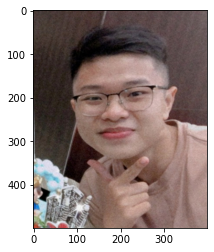

In [30]:
print("Have you registered library's card ?")
print("1. Yes")
print("2. Not yet. I want to sign up now")
c = int(input("Your choose: "))
if c==1:
    print("Press q to capture")
    webcam()
    face_recognition("./resource/testing/checking.jpg")
elif c==2:
    sign_up()
else:
    print("===> Invalid value")